# Que. From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. (Prediction using Unsupervised ML)
● Use R or Python or perform this task

● Dataset : https://bit.ly/3kXTdox

In [199]:
# import the required module

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
import sys
import scipy
import matplotlib
import sklearn


from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import stratiFiedkFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline
print("module and libraries imported successfully")

module and libraries imported successfully


In [70]:
# load the data 
#url = "https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view "
#iris_df = pd.read_csv(url)

iris = pd.read_csv("D:\Grip\Iris.csv",index_col=0)
#iris.head()
print("data loadded successfully")

data loadded successfully


In [3]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [4]:
#iris = datasets.load_iris()
#iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

iris.head()

#data = pd.read_csv("Iris.csv",index_col=0)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris.shape

(150, 5)

In [7]:
iris.size

750

In [8]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [74]:
iris.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
67,5.6,3.0,4.5,1.5,Iris-versicolor
81,5.5,2.4,3.8,1.1,Iris-versicolor
18,5.1,3.5,1.4,0.3,Iris-setosa
149,6.2,3.4,5.4,2.3,Iris-virginica
102,5.8,2.7,5.1,1.9,Iris-virginica
11,5.4,3.7,1.5,0.2,Iris-setosa
89,5.6,3.0,4.1,1.3,Iris-versicolor
91,5.5,2.6,4.4,1.2,Iris-versicolor
114,5.7,2.5,5.0,2.0,Iris-virginica


In [9]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [184]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5   labels         150 non-null    int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 12.6+ KB


In [186]:
# class distribution:

iris.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### checking Null value:

In [11]:
iris.isnull()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
...,...,...,...,...,...
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [12]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
iris.isnull().values.any()

False

In [14]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [15]:
print("Info:")
print(iris.info())

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None


## EDA
### Univariate Analysis

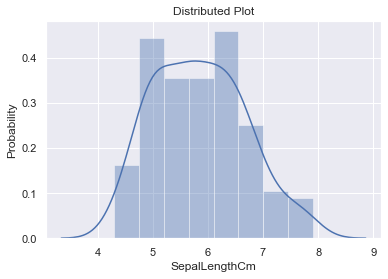

In [74]:
sns.distplot(iris["SepalLengthCm"])
plt.xlabel("SepalLengthCm")
plt.ylabel("Probability")
plt.title("Distributed Plot")
plt.show()

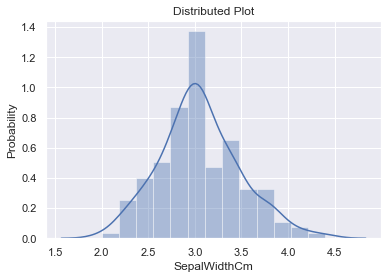

In [75]:
sns.distplot(iris["SepalWidthCm"])
plt.xlabel("SepalWidthCm")
plt.ylabel("Probability")
plt.title("Distributed Plot")
plt.show()

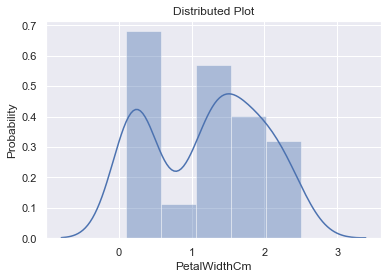

In [76]:
sns.distplot(iris["PetalWidthCm"])
plt.xlabel("PetalWidthCm")
plt.ylabel("Probability")
plt.title("Distributed Plot")
plt.show()

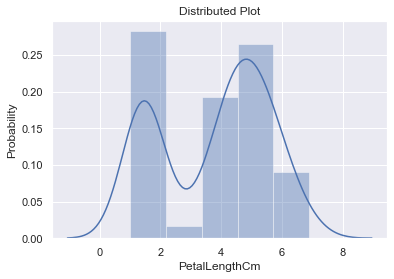

In [77]:
sns.distplot(iris["PetalLengthCm"])
plt.xlabel("PetalLengthCm")
plt.ylabel("Probability")
plt.title("Distributed Plot")
plt.show()

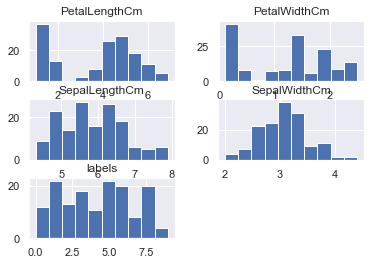

In [171]:
iris.hist()
plt.show()

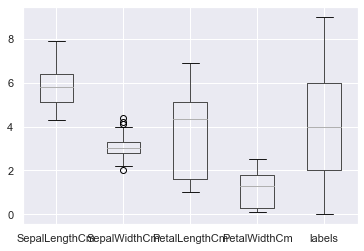

In [195]:
#iris.boxplot(kind = "box", subplots = True, layout = (2,2), sharex = False, sharey = False)
#plt.show()

#sns.set_style("whitegrid") 
  
#sns.boxplot(x = '', y = 'total_bill', data = iris)

iris.boxplot()
plt.show()

### Finding the correlation

In [16]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [17]:
# To find the correlation among 
# the columns using pearson method 
iris.corr(method ='pearson') 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [18]:
# To find the correlation among 
# the columns using kendall method 
iris.corr(method ='kendall') 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.072112,0.717624,0.654960
SepalWidthCm,-0.072112,1.000000,-0.182391,-0.146988
PetalLengthCm,0.717624,-0.182391,1.000000,0.803014
PetalWidthCm,0.654960,-0.146988,0.803014,1.000000


In [19]:
iris.corr(method = "spearman")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.159457,0.881386,0.834421
SepalWidthCm,-0.159457,1.000000,-0.303421,-0.277511
PetalLengthCm,0.881386,-0.303421,1.000000,0.936003
PetalWidthCm,0.834421,-0.277511,0.936003,1.000000


In [20]:
corrMatrix = iris.corr()
print (corrMatrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


###  Get a Visual Representation of the Correlation Matrix using Seaborn and Matplotlib

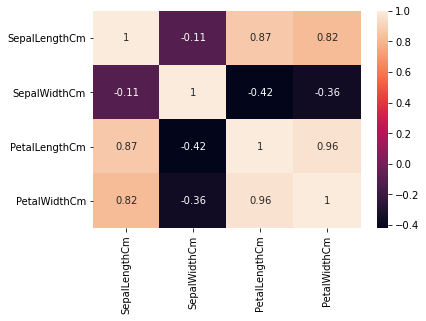

In [21]:
##  the seaborn and matplotlib packages in order to get a visual representation of the correlation matrix.
# Multivariate Analysis

corrMatrix = iris.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

- There is ahigh positive correlation between :

    1. Sepal Length and Petal Width
    2. Petal Length and Petal Width
    3. Sepal Length and Petal Length
    

- There is anegative correlation between:

    1. Sepal Width and petal Width
    2. Sepal Width and Petal Length
    3. Sepal Length and Sepal Width

Text(0, 0.5, 'Sapel Width')

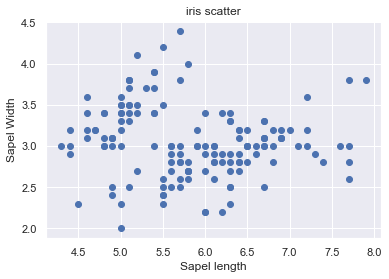

In [65]:
# Scatter plot by matplotlib
plt.scatter(iris.SepalLengthCm, iris.SepalWidthCm) 
# For setting a title and label
plt.title('iris scatter')
plt.xlabel('Sapel length')
plt.ylabel('Sapel Width')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


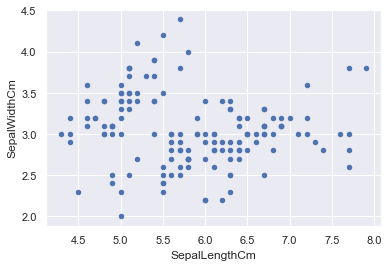

In [66]:
# Scatter plot by pandas
iris.plot(kind = 'scatter',x = 'SepalLengthCm', y = 'SepalWidthCm')

Text(0, 0.5, 'Petal Width')

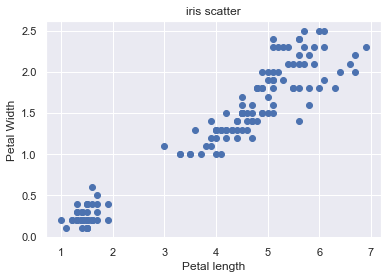

In [67]:
# for Petal length and Petal width

plt.scatter(iris.PetalLengthCm, iris.PetalWidthCm) 

plt.title('iris scatter')
plt.xlabel('Petal length')
plt.ylabel('Petal Width')

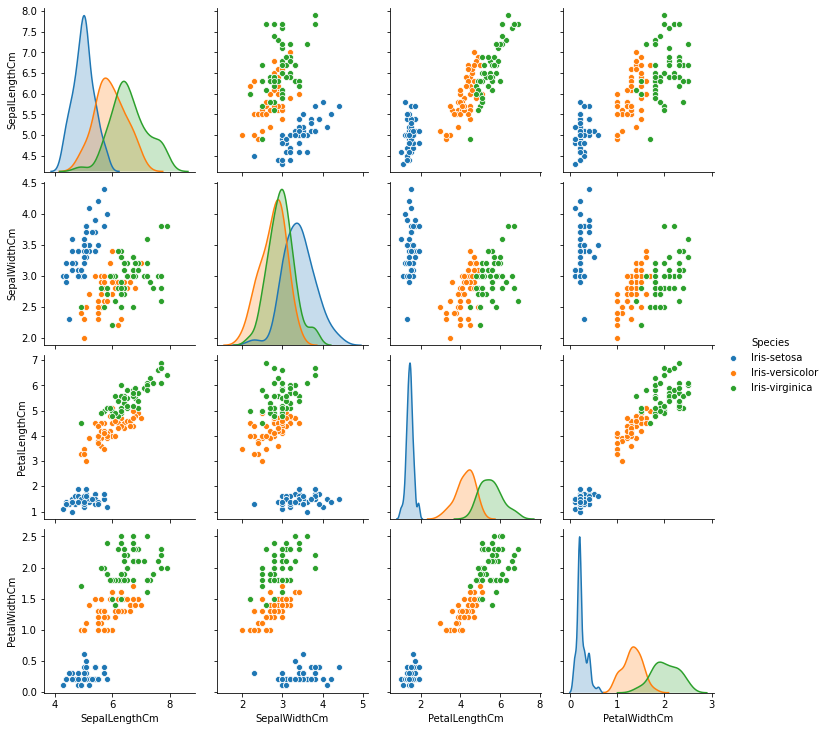

In [22]:
sns.pairplot(iris,hue="Species")

# in seaborn, the hue parameter denotes which column decides the kind of color, i.e. it's red, or green, while the lightness or saturation property may depend on other value columns.

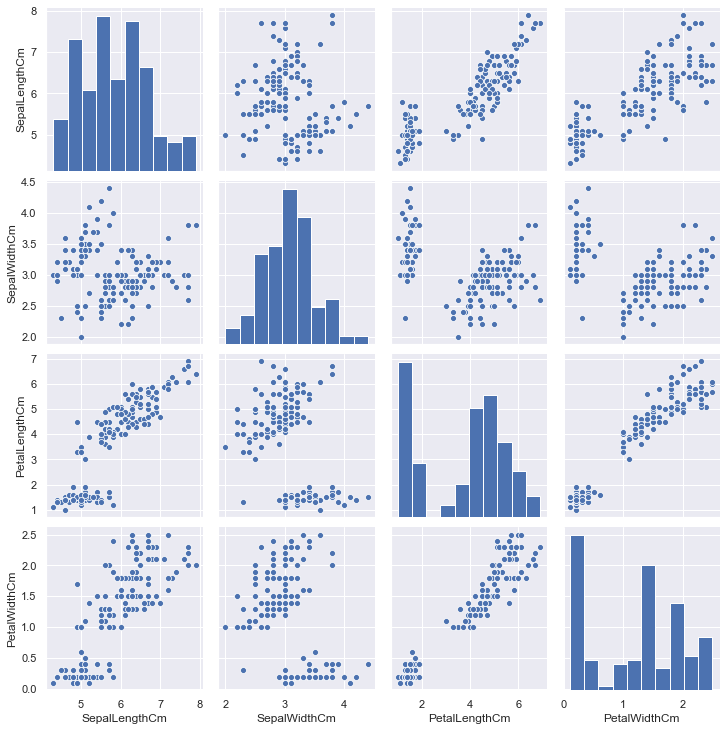

In [81]:
sns.pairplot(iris)
plt.show()


# From the pair plot. it can be visually seen that there can be atleast 2 different cluster.

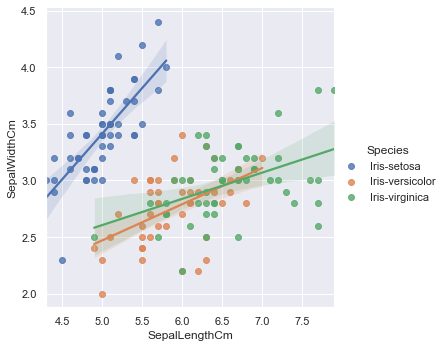

In [30]:
import seaborn as sns; 
sns.set(color_codes=True)
sns.lmplot(x="SepalLengthCm", y="SepalWidthCm", hue = "Species", data=iris)

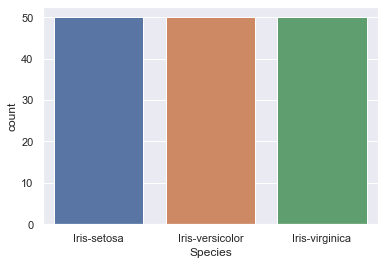

In [52]:
sns.countplot("Species", data = iris)

### Finding the optimum number of clusters for k-means classification

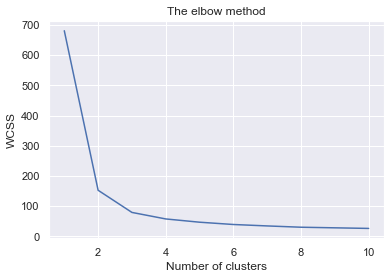

In [35]:
x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

#It is clear that at '3' there is no more futher bend

In [167]:
pd.Series(kmeans.labels_).value_counts()

5    22
1    22
8    20
6    20
3    18
2    13
0    12
4    11
7     8
9     4
dtype: int64

### by taking no of cluster = 3

In [206]:
means = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 8 8 8 1 7 8 1 8 8 7 1 8 8 7 7 7 1 7 1 1 1 8 1 1 8 1 1 1 8 8 1 7 7 8 8 1
 8 8 1 1 8 8 1 1 8 1 8 1 1 6 6 6 2 6 4 6 9 6 2 9 4 2 6 2 6 4 2 6 2 3 2 3 6
 6 6 6 6 6 2 2 2 2 3 4 6 6 6 4 2 4 6 2 9 4 4 4 6 9 4 5 3 0 5 5 0 4 0 5 0 5
 3 5 3 3 5 5 0 0 3 5 3 0 3 5 0 3 3 5 0 0 0 5 3 3 0 5 5 3 5 5 5 3 5 5 5 3 5
 5 3]


In [38]:
kmeans.cluster_centers_

array([[7.475     , 3.125     , 6.3       , 2.05      ],
       [5.10909091, 3.50909091, 1.53181818, 0.28181818],
       [5.66153846, 2.56153846, 3.87692308, 1.16923077],
       [6.02777778, 2.73333333, 5.02777778, 1.79444444],
       [5.57272727, 2.84545455, 4.30909091, 1.37272727],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [6.43      , 2.94      , 4.59      , 1.435     ],
       [5.5125    , 4.        , 1.475     , 0.275     ],
       [4.69      , 3.085     , 1.385     , 0.19      ],
       [5.        , 2.3       , 3.275     , 1.025     ]])

### VISUALIZATION

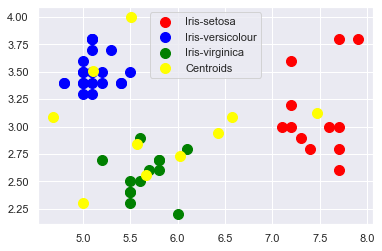

In [205]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

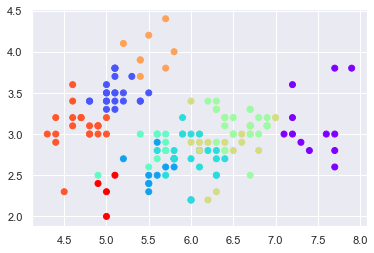

In [42]:

plt.scatter(x[:, 0],x[:, 1],c=y_kmeans,cmap='rainbow')

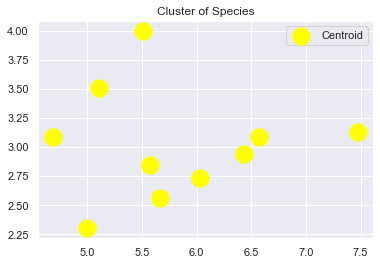

In [45]:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1] ,s = 300, c = 'yellow', label = 'Centroid')
plt.title('Cluster of Species')
plt.legend()
plt.show()

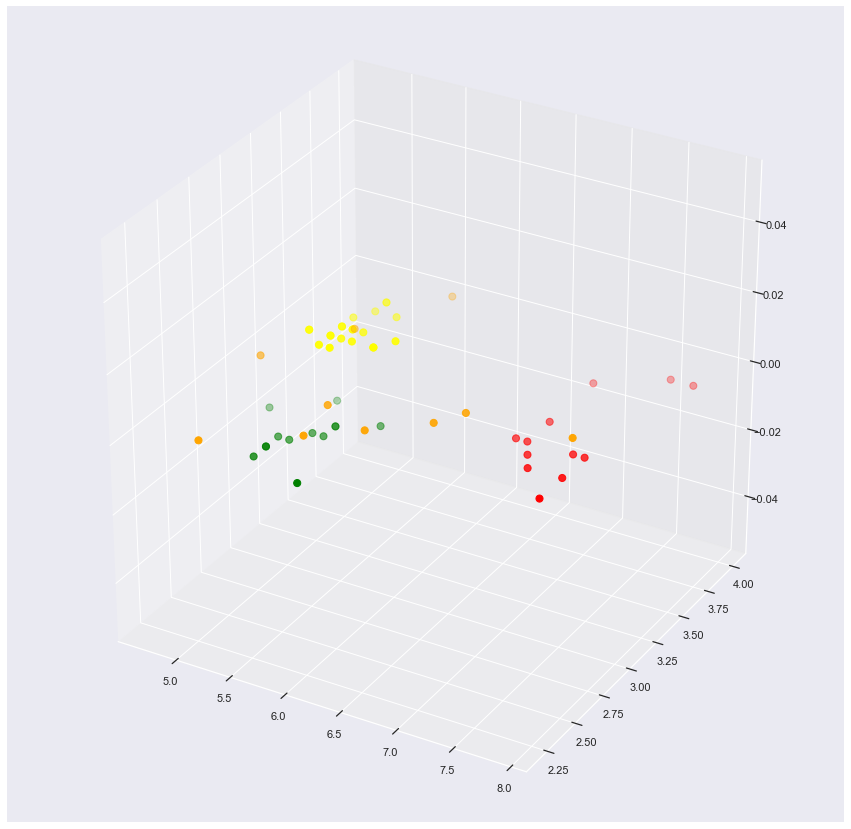

In [55]:
# 3d scatter plot:

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = "3d")
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1], s = 50, c = "red", label = " Iris_setosa")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1], s = 50, c = "yellow", label = " Iris_versicolour")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1], s = 50, c = "green", label = " Iris_virginica")

# plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 50, c = "orange", label = "centroids")
plt.show()

In [161]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3
0,7.475000,3.125000,6.300000,2.050000
1,5.109091,3.509091,1.531818,0.281818
2,5.661538,2.561538,3.876923,1.169231
3,6.027778,2.733333,5.027778,1.794444
4,5.572727,2.845455,4.309091,1.372727
5,6.568182,3.086364,5.536364,2.163636
6,6.430000,2.940000,4.590000,1.435000
7,5.512500,4.000000,1.475000,0.275000
8,4.690000,3.085000,1.385000,0.190000
9,5.000000,2.300000,3.275000,1.025000


In [162]:
iris["labels"] = kmeans. labels_

In [163]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,8
3,4.7,3.2,1.3,0.2,Iris-setosa,8
4,4.6,3.1,1.5,0.2,Iris-setosa,8
5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [164]:
iris.groupby("labels").mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
labels,,,,
0,7.475000,3.125000,6.300000,2.050000
1,5.109091,3.509091,1.531818,0.281818
2,5.661538,2.561538,3.876923,1.169231
3,6.027778,2.733333,5.027778,1.794444
4,5.572727,2.845455,4.309091,1.372727
5,6.568182,3.086364,5.536364,2.163636
6,6.430000,2.940000,4.590000,1.435000
7,5.512500,4.000000,1.475000,0.275000
8,4.690000,3.085000,1.385000,0.190000


### Build Model

we dont know which algo is suitable for this querry 
so we use some algorithm to get the idea from plot that clasify lineary with some dimensions

    1. Logistic regression(LR) 
    2. Linear Discriminant Anaysis(LDA)
    3. K-Nearest Neighbour(KNN)
    4. Classification and Regression Tree(CART)
    5. Gaussion Naive Bayes(NB)
    6. Support Vector Machine(SVM)
    
- linear(LR, LDA) 
- Nonlinear(KNN, CART, NB, SVM)

In [ ]:
models = []
models.append(("LR", LogisticRegression(solver = "liblinear", multi_class = "over")))
models.append(("LDA", LinearDiscriminantAnaysis()))
models.append(("KNN", KNeighboursClassifier()))
models.append(("NB", GussianNB()))
models.append(("SVM", SVC(gamma = "auto")))

result = []
names = []
 
    for name, model in models:
        kfold = structure
               
    